# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.0,28.5
Alto Alegre dos Parecis,25.0,28.0
Alto Paraíso,24.0,25.5
Alvorada D'Oeste,25.0,31.0
Ariquemes,25.0,29.0
Buritis,25.0,28.5
Cabixi,26.0,35.5
Cacaulândia,25.0,33.5
Cacoal,26.0,30.0


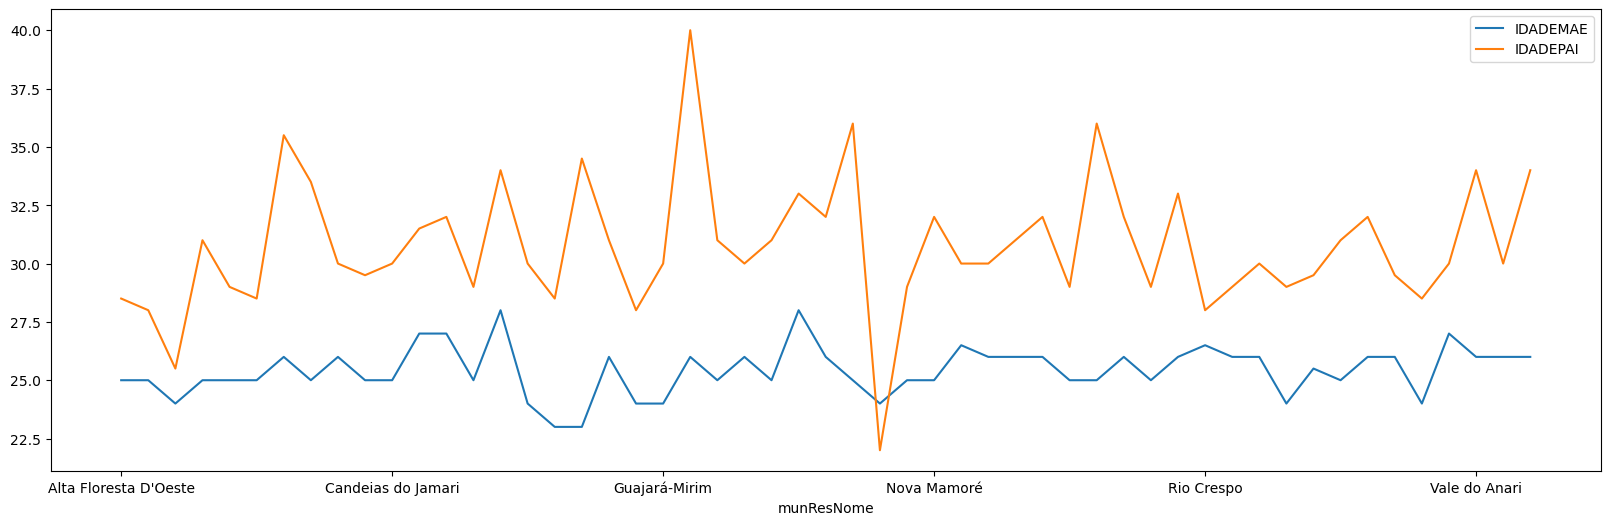

In [53]:
municipio=sinasc_raw[['munResNome','IDADEMAE','IDADEPAI']]
municipio.groupby('munResNome')
municipio.groupby('munResNome').median().plot(figsize=[20,6])
municipio.groupby('munResNome').median()

### Verificamos que os pais são mais velhos que as mães.

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [8]:
peso_medio=sinasc_raw[['ESCMAE','DTNASC','SEXO','PESO']]
data=peso_medio[peso_medio['DTNASC']=="2019-01-02"]
data.groupby(['ESCMAE','SEXO'])['PESO'].mean()

ESCMAE           SEXO     
1 a 3 anos       Masculino    2970.000000
12 anos ou mais  Feminino     2841.285714
                 Masculino    3169.363636
4 a 7 anos       Feminino     3175.000000
                 Masculino    3550.285714
8 a 11 anos      Feminino     3339.142857
                 Masculino    3468.437500
Name: PESO, dtype: float64

<Axes: xlabel='ESCMAE,SEXO'>

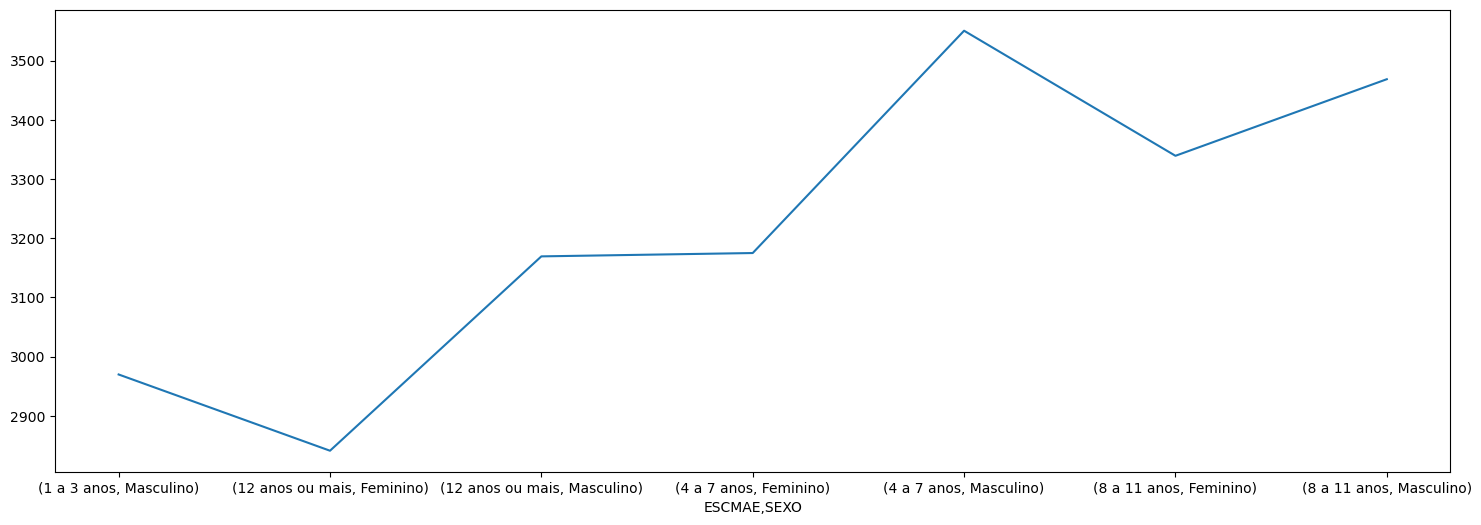

In [28]:
data.groupby(['ESCMAE','SEXO'])['PESO'].mean().plot(figsize=[18,6])

### No dia 02 de janeiro não houve nascimento de meninas para as mães de escolaridade entre 1 a 3 anos, e os meninos são mais pesados que as meninas em todos os níveis de escolaridade.

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [10]:
menos_bebe=sinasc_raw[['DTNASC','munResNome','IDADEMAE','IDADEPAI']]
print(menos_bebe.groupby('munResNome').count())
print(menos_bebe.groupby('munResNome').count().min())
idade=(menos_bebe[menos_bebe['munResNome']=='Município ignorado - RO']).groupby('munResNome')[('IDADEMAE'),('IDADEPAI')]
idade.median()
idade.max()
idade.min()

                           DTNASC  IDADEMAE  IDADEPAI
munResNome                                           
Alta Floresta D'Oeste         367       367       308
Alto Alegre dos Parecis       154       154       134
Alto Paraíso                  226       226         6
Alvorada D'Oeste              205       205       103
Ariquemes                    1729      1729        15
Buritis                       583       583        64
Cabixi                         80        80         6
Cacaulândia                    75        75         6
Cacoal                       1374      1374      1262
Campo Novo de Rondônia        166       166        30
Candeias do Jamari            337       337        19
Castanheiras                   32        32        28
Cerejeiras                    237       237        72
Chupinguaia                   162       162        27
Colorado do Oeste             214       214        31
Corumbiara                    127       127        17
Costa Marques               

C:\Users\dan22\AppData\Local\Temp\ipykernel_3968\1288611521.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  idade=(menos_bebe[menos_bebe['munResNome']=='Município ignorado - RO']).groupby('munResNome')[('IDADEMAE'),('IDADEPAI')]


,IDADEMAE,IDADEPAI
munResNome,,
Município ignorado - RO,24,22.0


<Axes: xlabel='munResNome'>

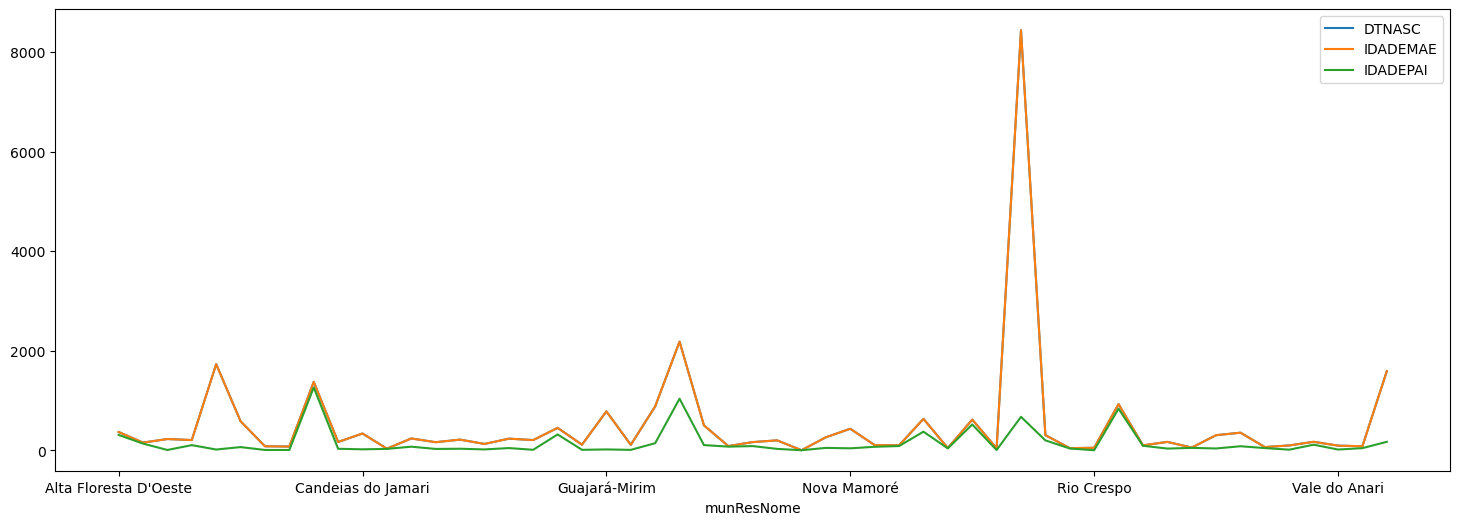

In [11]:
menos_bebe.groupby('munResNome').count().plot(figsize=[18,6])

#### O município onde nasceu menos bebê em 2019 foi "Município ignorado - RO"  com apenas 1 nascimento, onde a mãe tem 24 anos e o pai 22 anos. 

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [12]:
mais_bebe=sinasc_raw[['DTNASC','munResNome','IDADEMAE','IDADEPAI','QTDFILVIVO']]
marco=mais_bebe[(mais_bebe['DTNASC']>='2019-03-01') & (mais_bebe['DTNASC']<='2019-03-31')]

print(marco.groupby('munResNome')['DTNASC'].count())
marco.groupby('munResNome')['DTNASC'].count().max()

munResNome
Alta Floresta D'Oeste         31
Alto Alegre dos Parecis       10
Alto Paraíso                  22
Alvorada D'Oeste              22
Ariquemes                    141
Buritis                       59
Cabixi                         6
Cacaulândia                   10
Cacoal                       133
Campo Novo de Rondônia        13
Candeias do Jamari            33
Castanheiras                   4
Cerejeiras                    16
Chupinguaia                   18
Colorado do Oeste             19
Corumbiara                    12
Costa Marques                 24
Cujubim                       17
Espigão D'Oeste               44
Governador Jorge Teixeira     10
Guajará-Mirim                 75
Itapuã do Oeste                8
Jaru                          80
Ji-Paraná                    188
Machadinho D'Oeste            44
Ministro Andreazza             6
Mirante da Serra               9
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Nova Mamoré                   53

744

<Axes: xlabel='munResNome'>

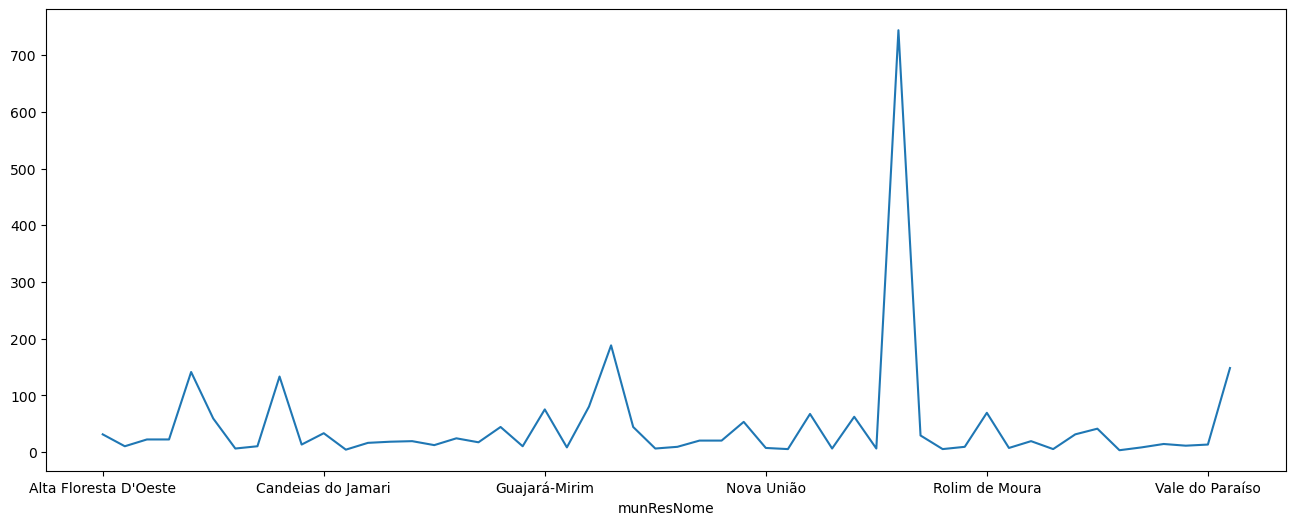

In [13]:
marco.groupby('munResNome')['DTNASC'].count().plot(figsize=[16,6])

### O município onde nasceu mais bebê em março de 2019 foi em "Porto Velho " com 744 nascimentos.   

In [15]:
filhos_vivos=mais_bebe[mais_bebe['munResNome']=='Porto Velho'].groupby('munResNome')['QTDFILVIVO']
print(f'Quantidade de filhos vivos são :      {filhos_vivos.count()}\n') 
print(f'A média de filhos vivos são :         {filhos_vivos.mean()}\n')
print(f'O máximo de filhos vivos são :        {filhos_vivos.max()}\n')
print(f'O mínimo de filhos vivos são :        {filhos_vivos.min()}')

Quantidade de filhos vivos são :      munResNome
Porto Velho    7319
Name: QTDFILVIVO, dtype: int64

A média de filhos vivos são :         munResNome
Porto Velho    1.167236
Name: QTDFILVIVO, dtype: float64

O máximo de filhos vivos são :        munResNome
Porto Velho    12.0
Name: QTDFILVIVO, dtype: float64

O mínimo de filhos vivos são :        munResNome
Porto Velho    0.0
Name: QTDFILVIVO, dtype: float64


munResNome
Porto Velho    Axes(0.125,0.11;0.775x0.77)
Name: QTDFILVIVO, dtype: object

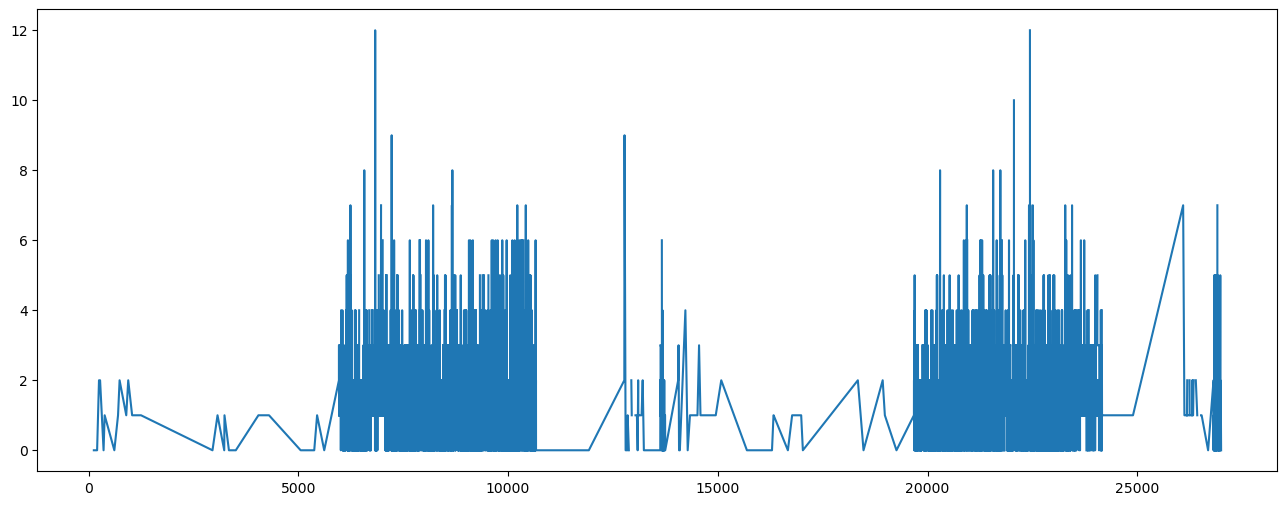

In [42]:
filhos_vivos.plot(figsize=[16,6])

C:\Users\dan22\AppData\Local\Temp\ipykernel_3968\10579642.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  idade_pais=mais_bebe[mais_bebe['munResNome']=='Porto Velho'].groupby('munResNome')[('IDADEMAE'),('IDADEPAI')]


             IDADEMAE   IDADEPAI
munResNome                      
Porto Velho  26.31267  32.352679

             IDADEMAE  IDADEPAI
munResNome                     
Porto Velho        47      65.0

             IDADEMAE  IDADEPAI
munResNome                     
Porto Velho        12      16.0


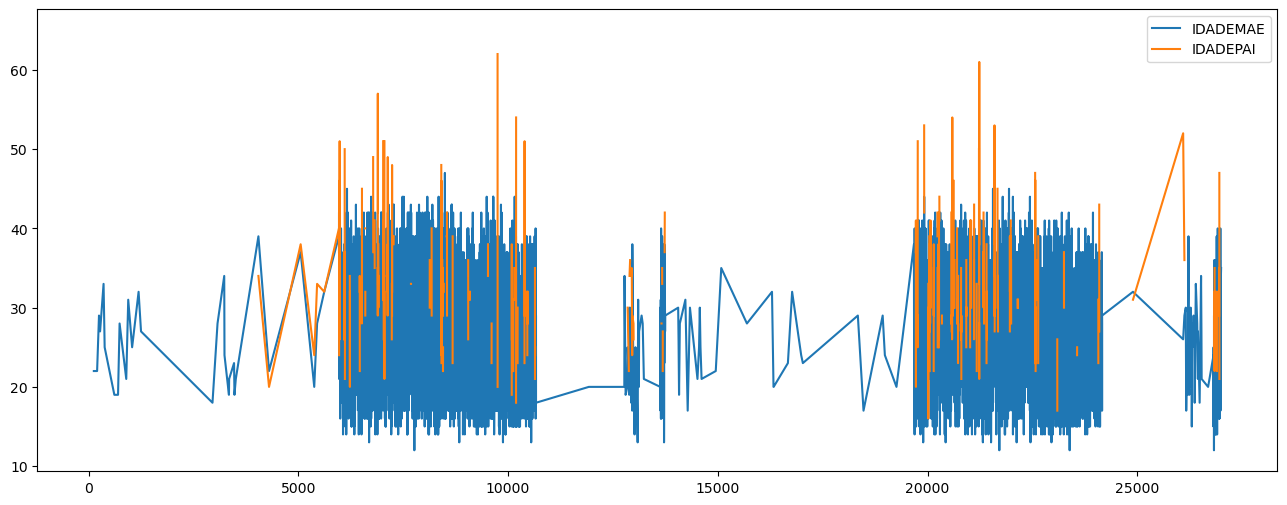

In [44]:
idade_pais=mais_bebe[mais_bebe['munResNome']=='Porto Velho'].groupby('munResNome')[('IDADEMAE'),('IDADEPAI')]
idade_pais.plot(figsize=[16,6])
print(f'{idade_pais.mean()}\n')
print(f'{idade_pais.max()}\n')
print(f'{idade_pais.min()}')

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

### 1. Verificamos que os pais são mais velhos que as mães.
### 2. No dia 02 de janeiro não houve nascimento de meninas para as mães de escolaridade entre 1 a 3 anos, e os meninos são mais pesados que as meninas em todos os níveis de escolaridade.
### 3. O município onde nasceu menos bebê em 2019 foi "Município ignorado - RO"  com apenas 1 nascimento, onde a mãe tem 24 anos e o pai 22 anos. 
### 4. O município onde nasceu mais bebê em março de 2019 foi em "Porto Velho " com 744 nascimentos. 
### 5. A idade media dos pais em Porto Velho são 26 (mães) e 32 (pais), a mãe mais velha com 47 anos e a mãe mais nova com 12 anos, o pai mais velho com 65 anos e o mais novo com 16 anos.
### 6. A quantidade de filhos vivos em Porto Velho são 7319, sendo a média 1,16 filhos vivos, variando entre 0 a 12 filhos.

In [17]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [18]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [19]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

RACACOR
Amarela       116
Branca       5386
Indígena      418
Parda       19594
Preta         867
Name: DTNASC, dtype: int64

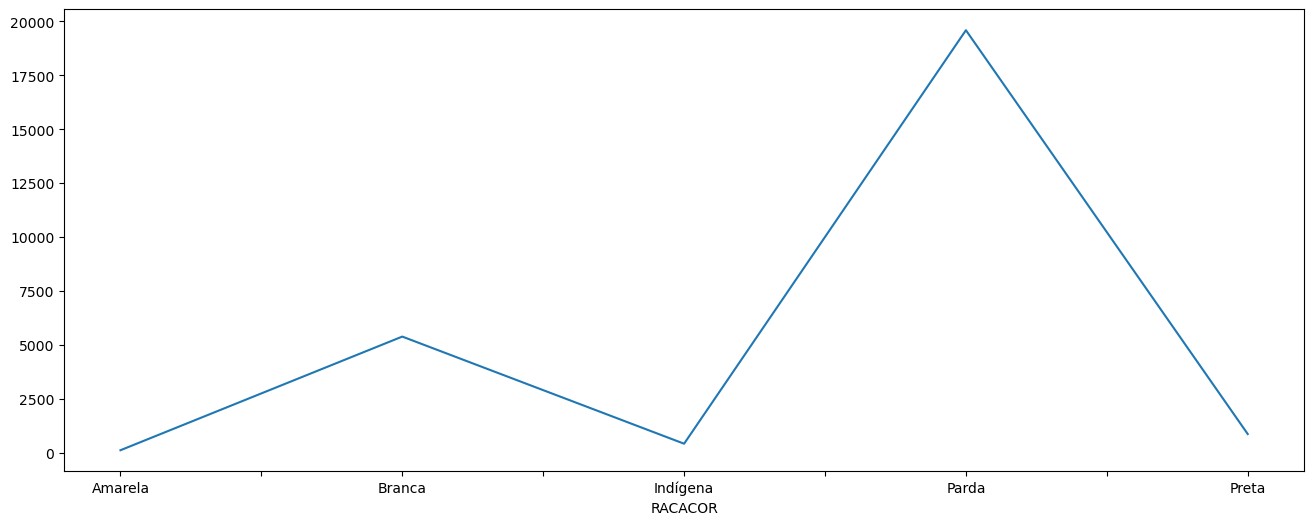

In [143]:
estudo=sinasc_raw[['DTNASC','munResNome','RACACOR','PARTO','ESCMAE',]]
raça=estudo.groupby('RACACOR')['DTNASC'].count()
estudo.groupby('RACACOR')['DTNASC'].count().plot(figsize=[16,6])
raça

In [86]:
total=estudo['RACACOR'].count()
print(f'{(116/total)*100} % são de cor amarela. \n')
print(f'{(5386/total)*100} % são de cor branca. \n')
print(f'{(418/total)*100} % são de cor indígena. \n')
print(f'{(19594/total)*100} % são de cor parda. \n')
print(f'{(867/total)*100} % são de cor preta. \n')


0.4397103976346613 % são de cor amarela. 

20.416208635002462 % são de cor branca. 

1.5844736742352452 % são de cor indígena. 

74.27315113149615 % são de cor parda. 

3.286456161631477 % são de cor preta. 



In [124]:
print(estudo['PARTO'].count())
print(estudo['PARTO'].value_counts()/26979*100)
print()
print(estudo[estudo['RACACOR']=='Amarela'].groupby('PARTO')['RACACOR'].count())
print()
print(estudo[estudo['RACACOR']=='Indígena'].groupby('PARTO')['RACACOR'].count())
print()
print(estudo[estudo['RACACOR']=='Branca'].groupby('PARTO')['RACACOR'].count())
print()
print(estudo[estudo['RACACOR']=='Parda'].groupby('PARTO')['RACACOR'].count())
print()
print(estudo[estudo['RACACOR']=='Preta'].groupby('PARTO')['RACACOR'].count())

26979
Cesáreo    66.851996
Vaginal    33.148004
Name: PARTO, dtype: float64

Amarela
PARTO
Cesáreo    83
Vaginal    33
Name: RACACOR, dtype: int64

PARTO
Cesáreo    137
Vaginal    280
Name: RACACOR, dtype: int64

PARTO
Cesáreo    4232
Vaginal    1143
Name: RACACOR, dtype: int64

PARTO
Cesáreo    12525
Vaginal     7035
Name: RACACOR, dtype: int64

PARTO
Cesáreo    587
Vaginal    278
Name: RACACOR, dtype: int64


In [139]:
print(estudo[estudo['RACACOR']=='Indígena'].groupby(['munResNome','PARTO'])['DTNASC'].count())
estudo[estudo['RACACOR']=='Indígena'].groupby(['munResNome','PARTO'])['DTNASC'].count().max()

munResNome                 PARTO  
Alta Floresta D'Oeste      Cesáreo      9
                           Vaginal     13
Alto Alegre dos Parecis    Cesáreo      2
                           Vaginal      1
Alvorada D'Oeste           Cesáreo      1
Buritis                    Cesáreo      1
Cacoal                     Cesáreo     23
                           Vaginal     22
Candeias do Jamari         Cesáreo      1
                           Vaginal      1
Chupinguaia                Cesáreo      6
                           Vaginal      3
Costa Marques              Cesáreo      4
                           Vaginal      1
Cujubim                    Cesáreo      1
Espigão D'Oeste            Cesáreo     16
                           Vaginal     18
Governador Jorge Teixeira  Vaginal      2
Guajará-Mirim              Cesáreo     29
                           Vaginal    143
Jaru                       Vaginal      1
Ji-Paraná                  Cesáreo     12
                           Vaginal     30

143

PARTO    ESCMAE         
Cesáreo  8 a 11 anos        10208
         12 anos ou mais     4698
         4 a 7 anos          2606
         1 a 3 anos           273
         Nenhuma               19
Vaginal  8 a 11 anos         5399
         4 a 7 anos          2150
         12 anos ou mais     1051
         1 a 3 anos           242
         Nenhuma               21
Name: ESCMAE, dtype: int64


<Axes: xlabel='PARTO,ESCMAE'>

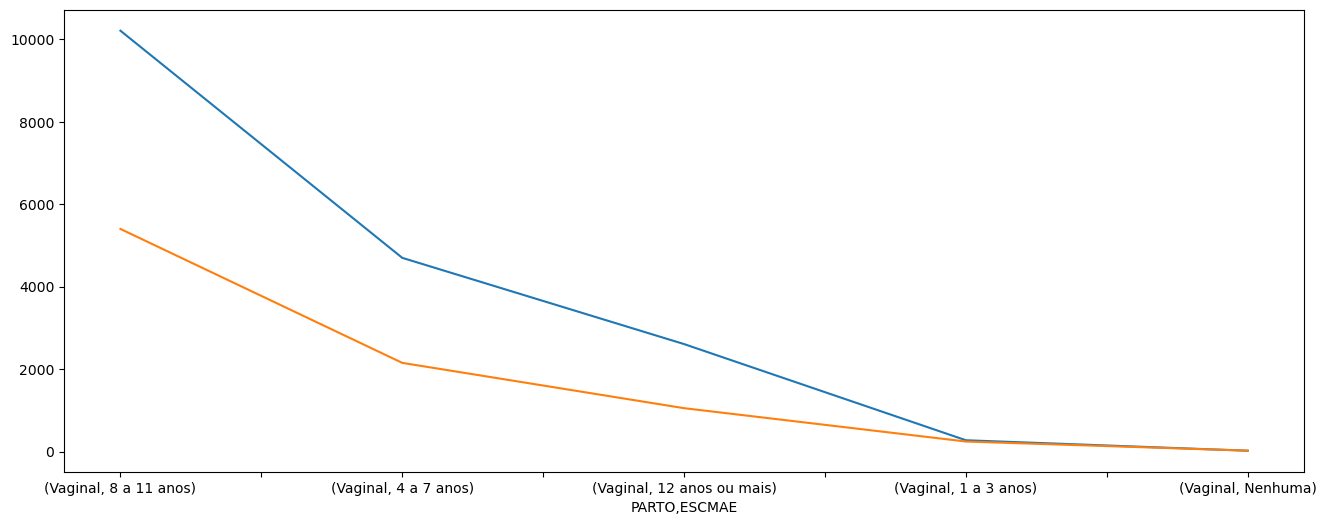

In [172]:
print(estudo.groupby('PARTO')['ESCMAE'].value_counts())
estudo[estudo['PARTO']=='Cesáreo'].groupby('PARTO')['ESCMAE'].value_counts().plot(figsize=[16,6])
estudo[estudo['PARTO']=='Vaginal'].groupby('PARTO')['ESCMAE'].value_counts().plot(figsize=[16,6])


#                                                            Insight

### 1.  74% dos bebês nascidos em Rondonia são pardos, 20% brancos, 3% pretos, 1,5% indígena e 0,4% amarelos.
### 2. Quanto menor a escolaridade, menor a diferença entre tipo de partos, quanto maior a escolaridade maior o número de partos cesária.
### 3.  66,85 % dos partos são cesária e 33,14% são normais.
### 4.  Em todas as raças os números de partos cesários são maiores que os partos normais, exceto na raça indígena.
### 5. A cidade que houve mais parto indígena foi em Guajará-Mirim, com 143 partos vaginais e 29 partos cesária.
### 6. Em Guajará-Mirim, a maior quantidades de parto indígena foi com mães com escolaridade entre 8 a 11 anos e verificado que para mães com 12 anos ou mais de estudo o tipo de parto mais comum é a cesária contrariando 
